### Mediapipe & OpenCV project : Drowsiness Detection

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp

In [40]:
# mediapipe를 이용해 양쪽 눈에 대한 landmark(index) 포인트를 가져옴

mp_facemesh = mp.solutions.face_mesh
mp_drawing  = mp.solutions.drawing_utils
denormalize_coordinates = mp_drawing._normalized_to_pixel_coordinates

##### FaceMash 눈 감지 test

In [41]:
# 왼쪽 눈 landmark points
all_left_eye_idxs = list(mp_facemesh.FACEMESH_LEFT_EYE)
all_left_eye_idxs = set(np.ravel(all_left_eye_idxs)) # 1차원으로 flatten
 
# 오른쪽 눈 landmark points
all_right_eye_idxs = list(mp_facemesh.FACEMESH_RIGHT_EYE)
all_right_eye_idxs = set(np.ravel(all_right_eye_idxs))
 
# 왼쪽, 오른쪽 landmark points를 합침
all_idxs = all_left_eye_idxs.union(all_right_eye_idxs)
 
# EAR에 사용할 12개의(각각 6개) landmark points 지정 :   P1,  P2,  P3,  P4,  P5,  P6
chosen_left_eye_idxs  = [362, 385, 387, 263, 373, 380]
chosen_right_eye_idxs = [33,  160, 158, 133, 153, 144]
all_chosen_idxs = chosen_left_eye_idxs + chosen_right_eye_idxs

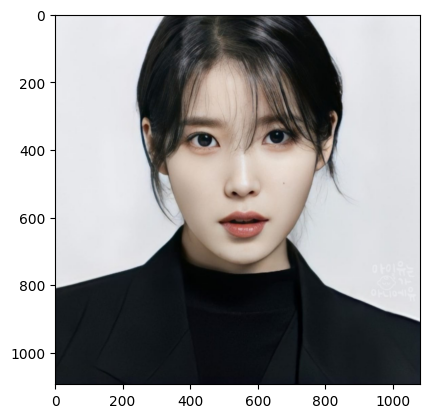

In [42]:
# load the image
image = cv2.imread(r"test_img.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert to RGB
image = np.ascontiguousarray(image) # 데이터를 빠르게 불러오기 위해 사용
imgH, imgW, _ = image.shape
 
plt.imshow(image)

In [43]:
# FaceMash 설정

with mp_facemesh.FaceMesh(
    static_image_mode=True,         # Default=False
    max_num_faces=1,                # 감지할 얼굴 수
    refine_landmarks=False,         # 눈 외의 landmark는 세분화시키지 않음
    min_detection_confidence=0.5,   # 얼굴 인식에 성공한 것으로 간주되는 최소 신뢰도
    min_tracking_confidence= 0.5,   # 성공적으로 추적한 것으로 간주되는 최소 신뢰도
) as face_mesh:
     
    results = face_mesh.process(image)
 
# 감지된 landmark points 목록
# print(bool(results.multi_face_landmarks))
results.multi_face_landmarks

[landmark {
   x: 0.5147278904914856
   y: 0.5397183895111084
   z: -0.045332252979278564
 }
 landmark {
   x: 0.5139013528823853
   y: 0.4797459840774536
   z: -0.09504269063472748
 }
 landmark {
   x: 0.513556957244873
   y: 0.49640733003616333
   z: -0.044814176857471466
 }
 landmark {
   x: 0.49756765365600586
   y: 0.41213348507881165
   z: -0.07725249975919724
 }
 landmark {
   x: 0.5136579275131226
   y: 0.4597766697406769
   z: -0.10303843021392822
 }
 landmark {
   x: 0.513214647769928
   y: 0.43211784958839417
   z: -0.09805196523666382
 }
 landmark {
   x: 0.5120490193367004
   y: 0.3634275794029236
   z: -0.05632898211479187
 }
 landmark {
   x: 0.37807369232177734
   y: 0.3495487570762634
   z: 0.012041053734719753
 }
 landmark {
   x: 0.5111583471298218
   y: 0.3098911643028259
   z: -0.04989514872431755
 }
 landmark {
   x: 0.5108934640884399
   y: 0.2826896905899048
   z: -0.05787431821227074
 }
 landmark {
   x: 0.5092717409133911
   y: 0.17915937304496765
   z: -0.050

In [44]:
# 첫번재 landmark point
landmark_0 = results.multi_face_landmarks[0].landmark[0]
print(landmark_0)
 
landmark_0_x = landmark_0.x * imgW 
landmark_0_y = landmark_0.y * imgH
landmark_0_z = landmark_0.z * imgW

# 이미지 상에서 첫번째 landmark의 좌표 값
print("X:", landmark_0_x)
print("Y:", landmark_0_y)
print("Z:", landmark_0_z)
 
print()
print("Total Length of '.landmark':", len(results.multi_face_landmarks[0].landmark))

x: 0.5147278904914856
y: 0.5397183895111084
z: -0.045332252979278564

X: 555.9061217308044
Y: 590.4519181251526
Z: -48.95883321762085

Total Length of '.landmark': 468


In [45]:
############################# 시각화 
# 1. drawing_utils를 통해 감지된 모든 landmarks 표시
# 2. 모든 eye landmarks 표시
# 3. 지정한 eye landmarks(12개) 표시

def plot(img_dt, img_eye_lmks=None, img_eye_lmks_chosen=None, face_landmarks=None, ts_thickness=1, ts_circle_radius=2, lmk_circle_radius=3, name="1"):
    
    image_drawing_tool = img_dt

    # all eye landmarks 
    image_eye_lmks = img_dt.copy() if img_eye_lmks is None else img_eye_lmks
     
    # chosen eye landmarks
    img_eye_lmks_chosen = img_dt.copy() if img_eye_lmks_chosen is None else img_eye_lmks_chosen
 
    # FaceMesh 시각화를 위한 drawspec 지정 ( 흰색 원으로 표시 )
    connections_drawing_spec = mp_drawing.DrawingSpec(
        thickness=ts_thickness, 
        circle_radius=ts_circle_radius, 
        color=(255, 255, 255)
    )
 
    fig = plt.figure(figsize=(20, 15))
    fig.set_facecolor("white")
 
    # landmarks 그리기
    mp_drawing.draw_landmarks(
        image=image_drawing_tool,
        landmark_list=face_landmarks,
        connections=mp_facemesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=connections_drawing_spec,
    )
 
    # 각 landmark에 대한 x,y,z 좌표값
    landmarks = face_landmarks.landmark
 
    for landmark_idx, landmark in enumerate(landmarks):
        if landmark_idx in all_idxs: # 모든 eye landmarks에 해당하는 경우
            pred_cord = denormalize_coordinates(landmark.x, 
                                                landmark.y, 
                                                imgW, imgH)
            cv2.circle(image_eye_lmks, 
                       pred_cord, 
                       lmk_circle_radius, 
                       (255, 255, 255), 
                       -1
                       )
 
        if landmark_idx in all_chosen_idxs: # 지정한 eye landmarks에 해당하는 경우
            pred_cord = denormalize_coordinates(landmark.x, 
                                                landmark.y, 
                                                imgW, imgH)
            cv2.circle(img_eye_lmks_chosen, 
                       pred_cord, 
                       lmk_circle_radius, 
                       (255, 255, 255), 
                       -1
                       )
 
    plt.subplot(1, 3, 1)
    plt.title("Face Mesh", fontsize=18)
    plt.imshow(image_drawing_tool)
    plt.axis("off")
 
    plt.subplot(1, 3, 2)
    plt.title("All eye landmarks", fontsize=18)
    plt.imshow(image_eye_lmks)
    plt.axis("off")
 
    plt.subplot(1, 3, 3)
    plt.imshow(img_eye_lmks_chosen)
    plt.title("Chosen landmarks", fontsize=18)
    plt.axis("off")
    plt.show()
    plt.close()
    return

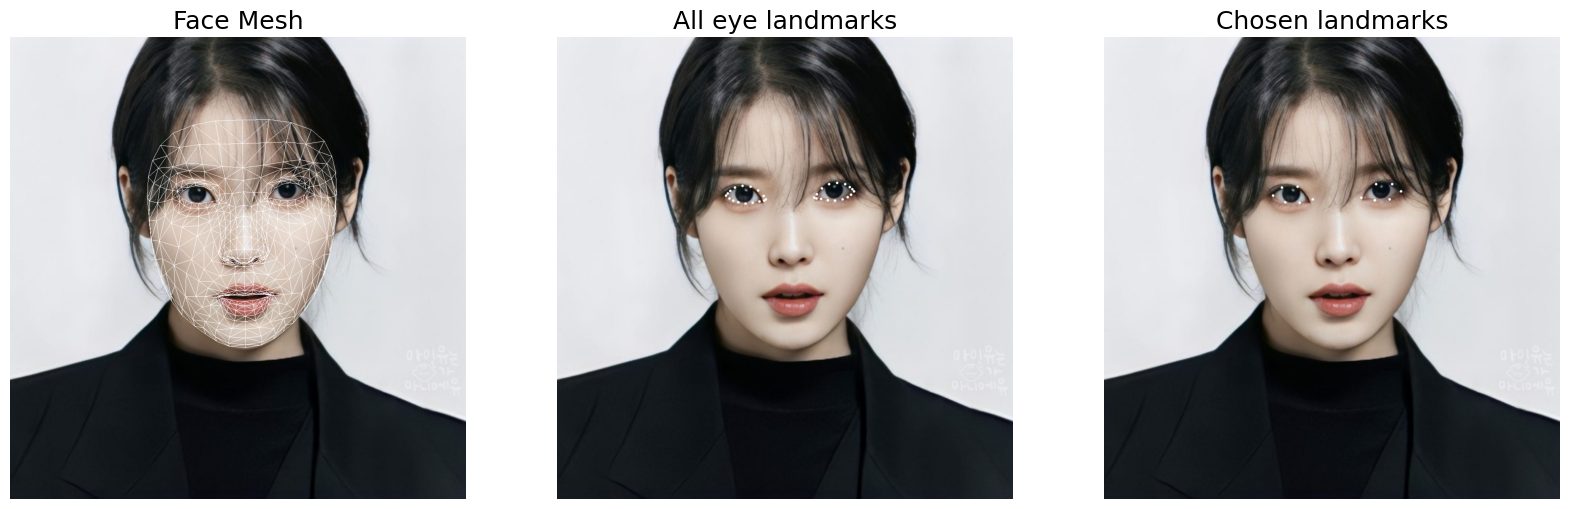

In [46]:
if results.multi_face_landmarks:
    for face_id, face_landmarks in enumerate(results.multi_face_landmarks):    
        plot(img_dt=image.copy(), face_landmarks=face_landmarks)

##### EAR 적용
    - Mediapipe의 FaceMesh를 사용해 눈 영역의 landmarks를 감지함 (관련 논문을 바탕으로 6개의 지정만 사용)
    - 눈의 높이와 너비 사이에서 EAR(Eye aspect ratio)를 계산함
    - EAR 값이 0에 가깝게 급격히 감소하는 경우 눈을 감았다고 판단함

In [47]:
def distance(point_1, point_2):
    # L2 norm 계산 (두 벡터 사이의 거리 계산)
    dist = sum([(i - j) ** 2 for i, j in zip(point_1, point_2)]) ** 0.5
    return dist

In [48]:
# EAR 공식 적용

def get_ear(landmarks, refer_idxs, frame_width, frame_height):
    # landmarks : 검출된 lanmarks list
    # refer_idxs : 검출을 위해 지정한 landmarks list [index]

    try:
        # 수평 거리 계산
        coords_points = []
        for i in refer_idxs:
            lm = landmarks[i]
            coord = denormalize_coordinates(lm.x, lm.y, frame_width, frame_height)
            coords_points.append(coord)
 
        # EAR 공식에 맞춰 P2-P6, P3-P5, P1-P4를 연산함
        P2_P6 = distance(coords_points[1], coords_points[5])
        P3_P5 = distance(coords_points[2], coords_points[4])
        P1_P4 = distance(coords_points[0], coords_points[3])
 
        ear = (P2_P6 + P3_P5) / (2.0 * P1_P4)
 
    except:
        ear = 0.0
        coords_points = None
 
    return ear, coords_points

In [49]:
def calculate_avg_ear(landmarks, left_eye_idxs, right_eye_idxs, image_w, image_h):
    
    # 왼쪽 눈의 EAR 값과 landmarks의 좌표 값을 반환함
    left_ear, left_lm_coordinates = get_ear(
                                      landmarks, 
                                      left_eye_idxs, 
                                      image_w, 
                                      image_h
                                    )
    
    # 오른쪽 눈의 EAR 값과 landmarks의 좌표 값을 반환함
    right_ear, right_lm_coordinates = get_ear(
                                      landmarks, 
                                      right_eye_idxs, 
                                      image_w, 
                                      image_h
                                    )
    # 최종 EAR 값을 얻기 위해 왼쪽 오른쪽의 EAR 값 평균을 계산함
    Avg_EAR = (left_ear + right_ear) / 2.0
 
    return Avg_EAR, (left_lm_coordinates, right_lm_coordinates)

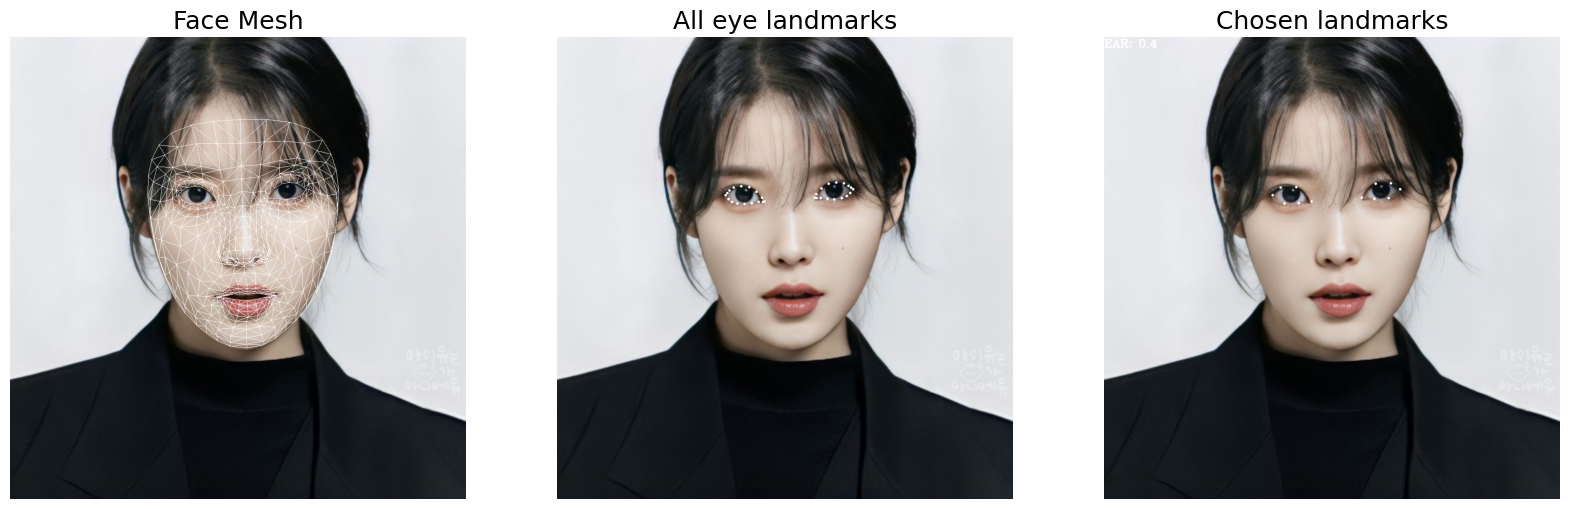

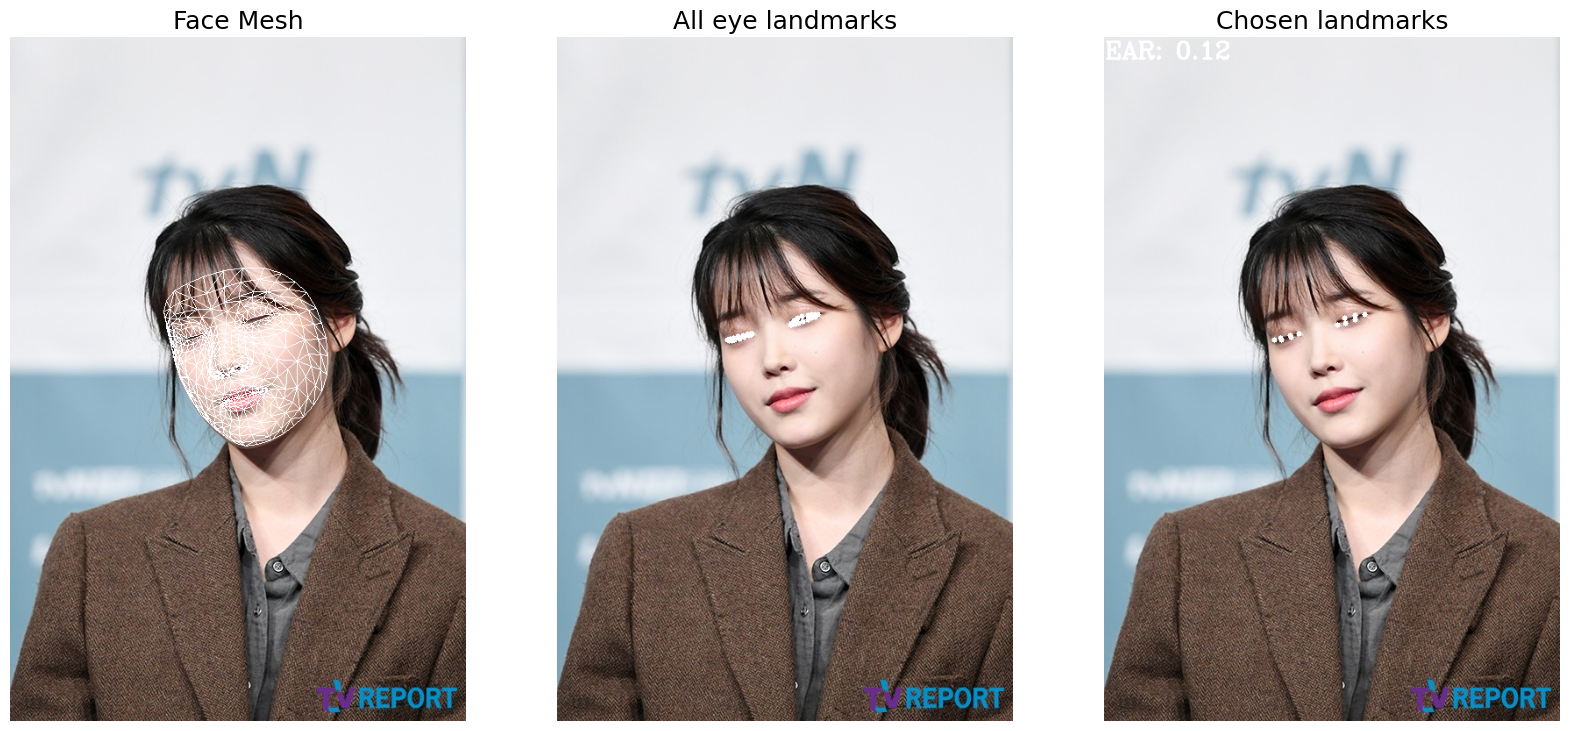

In [54]:
image_eyes_open  = cv2.imread("test_img.jpg")[:, :, ::-1]
image_eyes_close = cv2.imread("test_img2.jpg")[:, :, ::-1]
 
for idx, image in enumerate([image_eyes_open, image_eyes_close]):
    
    image = np.ascontiguousarray(image) # 데이터 빨리 불러오기
    imgH, imgW, _ = image.shape
 
    custom_chosen_lmk_image = image.copy()
 
    with mp_facemesh.FaceMesh(refine_landmarks=True) as face_mesh:
        results = face_mesh.process(image).multi_face_landmarks
 
        # facemesh로 감지가 되는 경우
        if results:
            for face_id, face_landmarks in enumerate(results):
                landmarks = face_landmarks.landmark
                # 감지된 전체 landmarks 중에서 지정한 eye landmarks만 인식하여 EAR 값을 계산함
                EAR, _ = calculate_avg_ear(
                          landmarks, 
                          chosen_left_eye_idxs, 
                          chosen_right_eye_idxs, 
                          imgW, 
                          imgH
                      )
                # print(EAR, _)  
                # _ : 양측 눈의 P1..P6 좌표값
 
                # 시각화
                cv2.putText(custom_chosen_lmk_image, 
                            f"EAR: {round(EAR, 2)}", (1, 24),
                            cv2.FONT_HERSHEY_COMPLEX, 
                            0.9, (255, 255, 255), 2
                )                
              
                plot(img_dt=image.copy(),
                     img_eye_lmks_chosen=custom_chosen_lmk_image,
                     face_landmarks=face_landmarks,
                     ts_thickness=1, 
                     ts_circle_radius=3, 
                     lmk_circle_radius=3
                )